In [1]:
# Imports
import pandas as pd
from pandas import Series,DataFrame
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
global_path=os.path.abspath('.')
train_df = pd.read_csv(global_path+'/data/train_users_2.csv')
test_df = pd.read_csv(global_path+'/data/test_users.csv')
ses_df = pd.read_csv(global_path+'/data/sessions.csv')

In [3]:
train_df = train_df.drop(['date_account_created','timestamp_first_active'], axis=1)
test_df = test_df.drop(['date_account_created','timestamp_first_active'], axis=1)

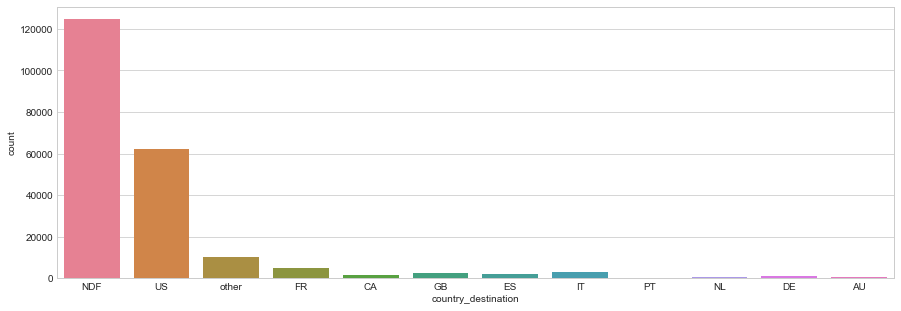

In [4]:
# country_destination
train_df['booked'] = (train_df['country_destination'] != 'NDF').astype(int)

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=train_df, palette="husl", ax=axis1)

In [5]:
# age
train_df["age"][train_df["age"] > 100] = np.NaN
test_df["age"][test_df["age"] > 100]     = np.NaN

average_age_airbnb   = train_df["age"].mean()
std_age_airbnb       = train_df["age"].std()
count_nan_age_airbnb = train_df["age"].isnull().sum() 

average_age_test   = test_df["age"].mean()
std_age_test       = test_df["age"].std()
count_nan_age_test = test_df["age"].isnull().sum()

rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

train_df["age"][np.isnan(train_df["age"])] = rand_1
test_df["age"][np.isnan(test_df["age"])]     = rand_2

train_df['age'] = train_df['age'].astype(int)
test_df['age'] = test_df['age'].astype(int)

/Users/sujie/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sujie/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sujie/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.la

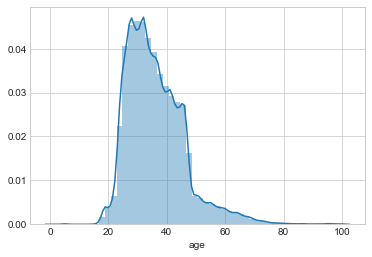

In [6]:
sns.distplot(train_df['age'].dropna())

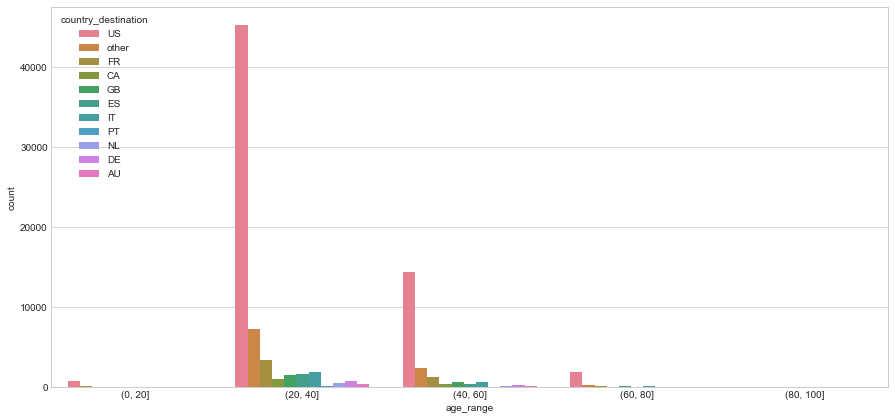

In [7]:
fig, (axis2) = plt.subplots(1,1,figsize=(15,7))

train_df['age'][train_df['country_destination'] != 'NDF'].hist(ax=axis2)
train_df['age_range'] = pd.cut(train_df["age"], [0, 20, 40, 60, 80, 100])
sns.countplot(x="age_range",hue="country_destination", data=train_df[train_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)

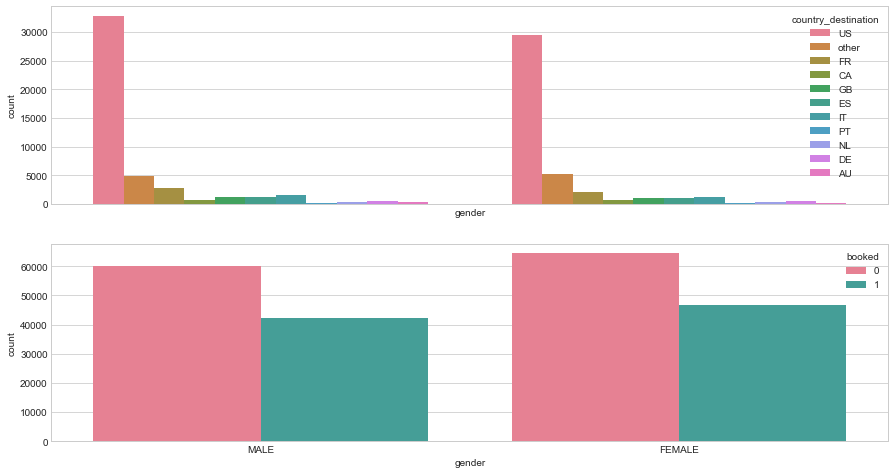

In [8]:
# gender
i = 0
def get_gender(gender):
    global i
    if gender != 'FEMALE' and gender != 'MALE':
        return 'FEMALE' if(i % 2) else 'MALE'
    i = i + 1
    return gender

train_df['gender'] = train_df['gender'].apply(get_gender)
test_df['gender'] = test_df['gender'].apply(get_gender)

fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

sns.countplot(x="gender",hue="country_destination", data=train_df[train_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)
sns.countplot(x="gender",hue="booked", data=train_df, palette="husl", ax=axis2)

train_df["gender"] = train_df["gender"].map({"FEMALE": 1, "MALE": 0})
test_df["gender"]   = test_df["gender"].map({"FEMALE": 1, "MALE": 0})

train_df.drop(['gender'], axis=1,inplace=True)
test_df.drop(['gender'], axis=1,inplace=True)

(10, 75)

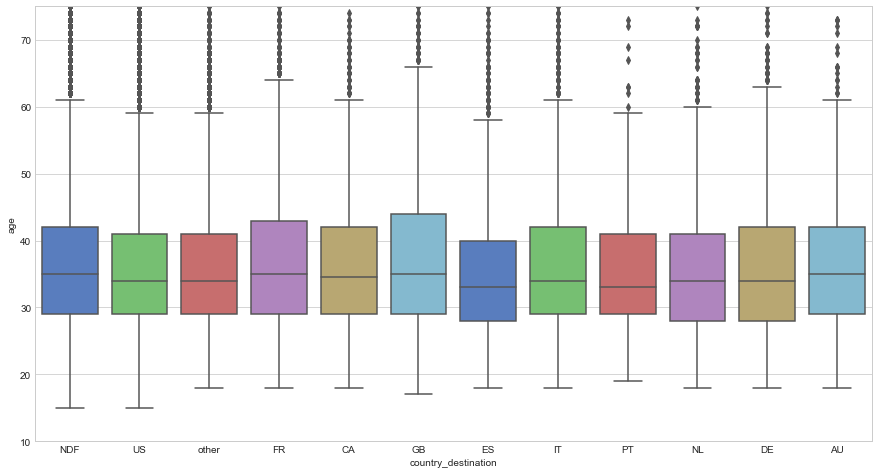

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=train_df, palette="muted", ax =ax)
ax.set_ylim([10, 75])

In [10]:
ses_df.shape

(10567737, 6)

In [11]:
ses_df['action'] = ses_df['action'].replace('-unknown-', np.nan)
ses_df['action_type'] = ses_df['action_type'].replace('-unknown-', np.nan)
ses_df['action_detail'] = ses_df['action_detail'].replace('-unknown-', np.nan)

In [12]:
ses_df['device_type'] = ses_df['device_type'].replace('-unknown-', np.nan)

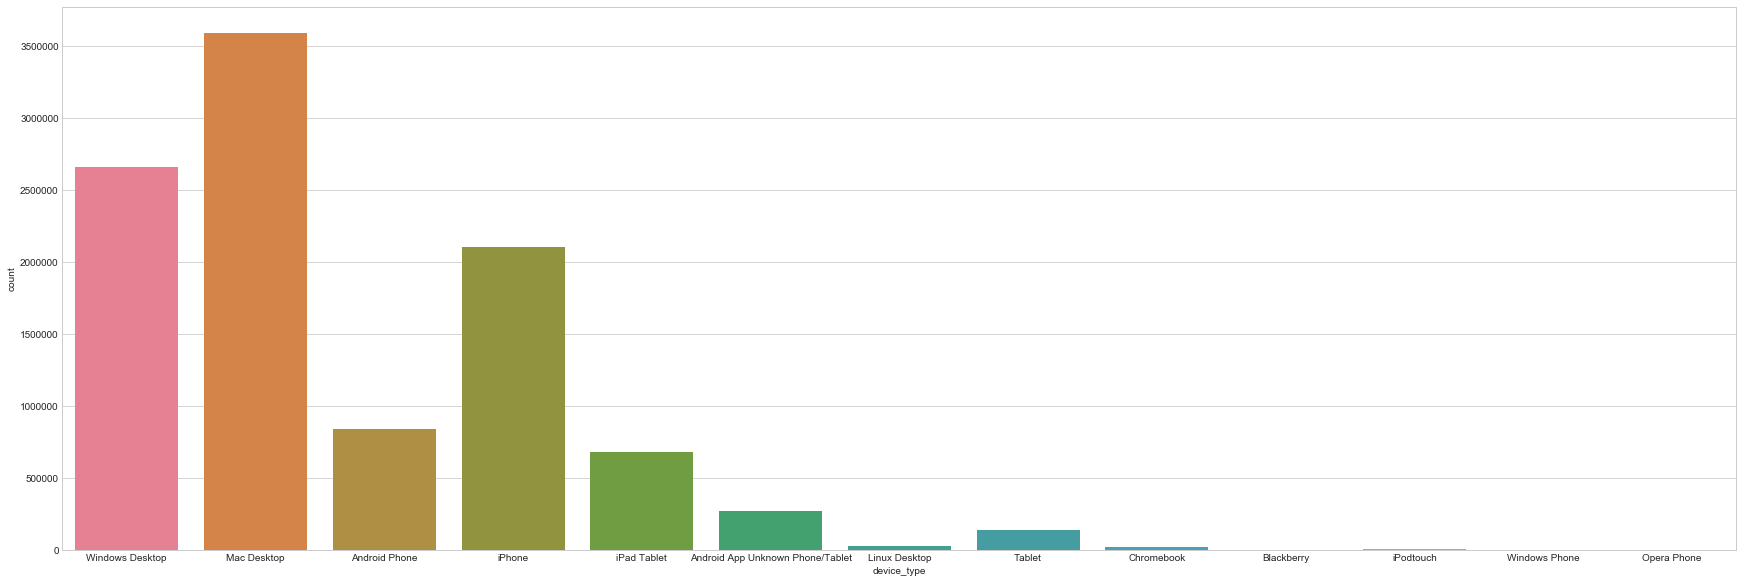

In [13]:
fig, (axis1) = plt.subplots(1,1,figsize=(30,10))
sns.countplot(x='device_type', data=ses_df, palette="husl", ax=axis1)